<a href="https://colab.research.google.com/github/kurrnia/Dicoding/blob/main/Dicoding%20Pengembangan%20Machine%20Learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Menggunakan Model untuk Melakukan Prediksi

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1]), keras.layers.Dense(units=8), keras.layers.Dense(units=1)])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 327ms/step - loss: 120.2007
Epoch 2/150
1/1 [==============================] - 0s 8ms/step - loss: 3.3187
Epoch 3/150
1/1 [==============================] - 0s 7ms/step - loss: 10.3262
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 42.1519
Epoch 5/150
1/1 [==============================] - 0s 7ms/step - loss: 1.1450
Epoch 6/150
1/1 [==============================] - 0s 6ms/step - loss: 3.6978
Epoch 7/150
1/1 [==============================] - 0s 6ms/step - loss: 9.6565
Epoch 8/150
1/1 [==============================] - 0s 6ms/step - loss: 36.7771
Epoch 9/150
1/1 [==============================] - 0s 7ms/step - loss: 1.1608
Epoch 10/150
1/1 [==============================] - 0s 6ms/step - loss: 3.9118
Epoch 11/150
1/1 [==============================] - 0s 6ms/step - loss: 9.1869
Epoch 12/150
1/1 [==============================] - 0s 10ms/step - loss: 33.7679
Epoch 13/150
1/1 [==============================] - 

In [ ]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 65ms/step
[[24.896038]]


## Membuat Model untuk Klasifikasi Dua Kelas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/citrus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1

<ipython-input-21-e9c3e7476411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'orange'] = 0
<ipython-input-21-e9c3e7476411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'grapefruit'] = 1


In [ ]:
dataset = df.values

In [ ]:
X = dataset[:,1:6]

In [ ]:
y = dataset[:,0]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
import numpy as np

Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([    
                    Dense(32, activation='relu', input_shape=(5,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.6629 - accuracy: 0.7746
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.9087
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.9177
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.9239
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.9247
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9239
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9249
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9257
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9259

In [ ]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9320


[0.18411985039710999, 0.9319999814033508]

## Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas

In [3]:
# import library yang akan digunakan
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# berfungsi untuk memanggil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.drop(columns='Id')

In [7]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [8]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [9]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [10]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [11]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [13]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])

In [14]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.1139 - accuracy: 0.4095
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0646 - accuracy: 0.5905
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0257 - accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9922 - accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9422 - accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9191 - accuracy: 0.6000
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8960 - accuracy: 0.6000
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8722 - accuracy: 0.6000
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8483 - accuracy: 0.6095
Epoch 11/100
4/4 [===========

In [16]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0628 - accuracy: 0.9778


[0.06279096752405167, 0.9777777791023254]

## Plot Loss dan Akurasi dari Trained Model

In [1]:
import matplotlib.pyplot as plt

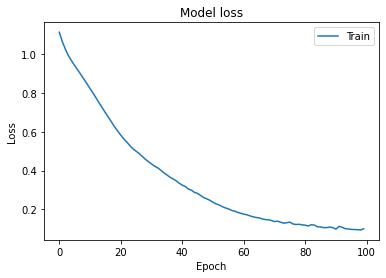

In [17]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

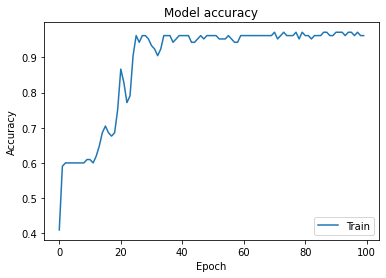

In [18]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## Penggunaan Callbacks

In [19]:
# import library
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [20]:
# berfungsi untuk memanggil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# selanjutnya membuat kelas callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [29]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 1.0662 - accuracy: 0.4190
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0254 - accuracy: 0.6571
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9915 - accuracy: 0.6571
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9612 - accuracy: 0.6571
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9303 - accuracy: 0.6571
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8992 - accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8667 - accuracy: 0.6667
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8350 - accuracy: 0.6667
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.6667
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7676 - accuracy: 0.6667
Epoch 11/50
4/4 [======================

## Menggunakan Dataset dari tf.data.datasets

In [30]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [31]:
mnist = tf.keras.datasets.mnist

In [32]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


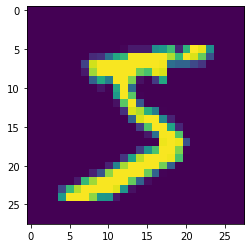

In [33]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [34]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [36]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2629 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1147 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0783 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9861


## Penggunaan Batch Loading

In [37]:
# dataset dan sintak sama seperti modul diatas
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# jika menggunakan batch size 32 (defalult) maka waktu yang dihabiskan berkisar 5-10 detik
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9932
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9956


In [40]:
# jika menggunakan batch size 128 maka waktu proses yang di jalankan menjadi lebih cepat
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9998
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 0.9999
